<a href="https://colab.research.google.com/github/FSDAwaesf/Detect-Person-Class-from-img-Collage-project/blob/main/Detect_Person_Class(Collage_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
data_path = '/content/yaleB01_P00A+000E+00.pgm'
x = cv2.imread(data_path)

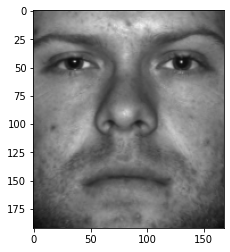

In [ ]:
plt.imshow(x)